# Testing Sentiment Analysis
-----

In this notebook, we test sentiment analysis techniques for analysing natural language for which there are three experiments.

As representations of conflict narratives, we curated a dataset comprising Hitler’s “Mein Kampf” along with political speeches from George Bush and Osama bin Laden during the “War on Terror”. In how he advocated for non-violence, Martin Luther King provides control data. 
We do not suggest any moral equivalence between each of these orators. Instead, we are exploring functional equivalence in the use of language to legitimise violence. Each has successfully brought about dramatic change through force, or in the case of Luther King, no-violent means.
Against this dataset, We tested three sentiment analysis API for this experiment. The first is TextBlob, a general-purpose and open-source NLP python library. As state-of-the-art technologies, and therefore more technically sophisticated, the next two are APIs from Google and Watson.
Having such extremes in the dataset means we can assess experimental results through observation since the moral colour each text is accepted, and we know who each were, or were not, seeking to legitimise violence against.

We will now see how quantitative representations of language can distort meaning. Where stark results would be expected from a dataset of extremes, our tests show that regardless of technical sophistication, these technologies are unable to distinguish abusive from non-abusive texts.

In the first experiment, we compare different document scores for each text.

In the second experiment, we compare scores for named entities identified in each document.

More experiments results to follow.

## Load the Sentiment Analysis Dataset and Show Metadata

In [52]:
apis = ["textblob", "watson", "google"]
filename = "sentiment_analytics"
filepath = os.getcwd()
            
sentiment_analytics = SentimentData(apis = apis,
                                   filename = filename,
                                   filepath = filepath)

sentiment_analytics.fromDisk()
sentiment_analytics.df

loading:  sentiment_analytics to:
C:\Users\Steve\OneDrive - University of Southampton\CNDPipeline\Quantitative Analysis


,ref,datestamp,title,word count,sentence count,textblob,watson,google
0,hitler,2020-06-30,Mein Kampf,706100,4527,0.096408,0.373203,-0.225447
1,bush,2001-09-11,911 Address to the Nation,3482,37,0.093816,0.469524,0.000000
2,bush,2001-09-14,Remarks at the National Day of Prayer & Rememb...,5116,57,0.153784,0.298916,0.000000
3,bush,2001-09-15,First Radio Address following 911,2667,30,0.196519,0.351540,0.000000
4,bush,2001-09-17,"Address at Islamic Center of Washington, D.C.",2695,39,-0.076026,0.333191,0.000000
5,bush,2001-09-20,Address to Joint Session of Congress Following...,17321,186,0.132154,-0.331922,-0.100000
6,bush,2001-10-07,Operation Enduring Freedom in Afghanistan Addr...,5693,57,0.167453,0.386644,0.000000
7,bush,2001-10-11,911 Pentagon Remembrance Address,6673,93,0.061266,-0.331954,-0.100000
8,bush,2001-10-11,Prime Time News Conference on War on Terror,4262,37,0.147233,0.333918,0.000000
9,bush,2001-10-11,Prime Time News Conference Q&A,32002,410,0.118774,0.297858,-0.100000


## Test 1 - Document Sentiment Scores

In this first test we look at how each API scores each text of the dataset overall.

In this test we colate and display document sentiment scores for TextBlob, Watson and Google.

Note - Mein Kampf is too large for the Google API limits, therefore, its score is derived from the mean sentence level sentiment score

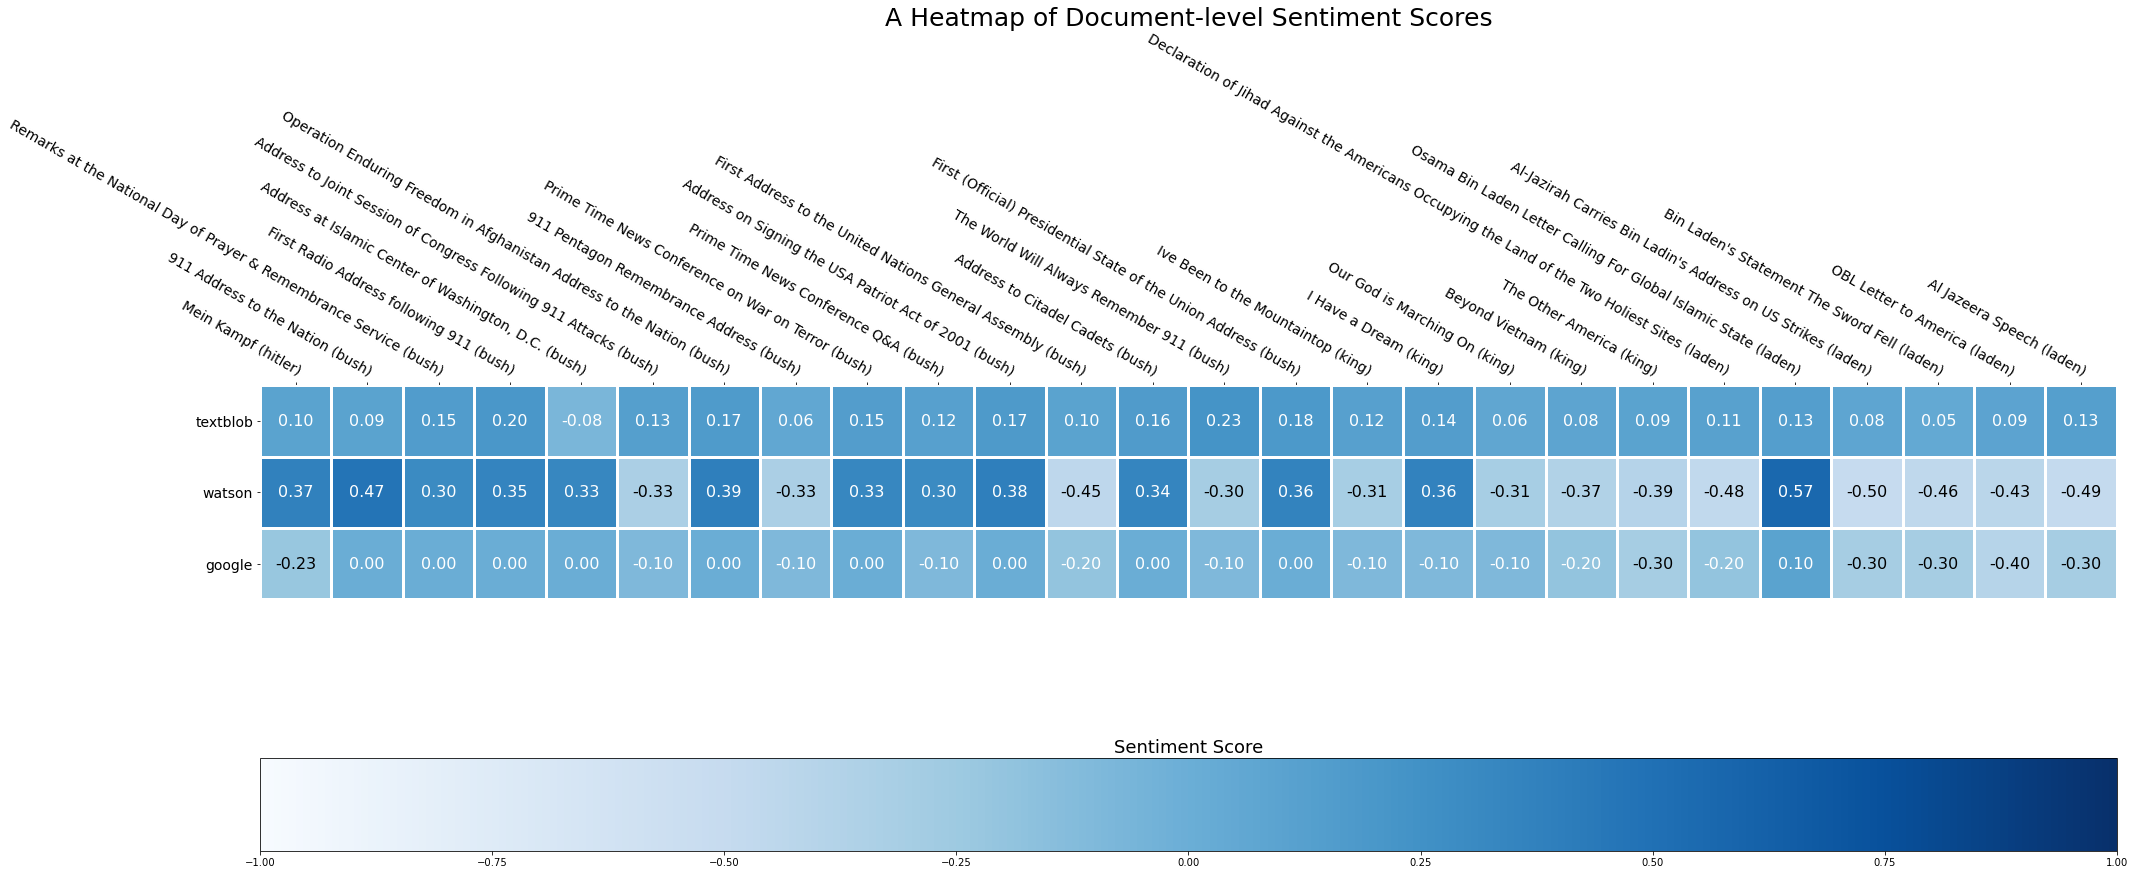

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import cndplots
importlib.reload(cndplots)

fig, ax = plt.subplots(figsize = (30, 15))

scores = np.array([sentiment_analytics.df[api] for api in sentiment_analytics.apis])

im, cbar = cndplots.heatmap(scores,
                    sentiment_analytics.apis,
                    [f'{title} ({ref})' for title, ref in zip(sentiment_analytics.df["title"], sentiment_analytics.df["ref"])], 
                    ax=ax,
                    figtitle = "A Heatmap of Document-level Sentiment Scores",
                    cmap="Blues", cbarlabel="Sentiment Score")

texts = cndplots.annotate_heatmap(im, valfmt="{x:.2f}")

fig.tight_layout()
plt.show()

### Test 1 - Discussion

Firstly, as a genocidal text, Textblob scores “Mein Kampf” at joint 15th for positivity and 5th highest for Watson. For negativity ranking, Google scores “Mein Kampf” as the sixth most negative. In comparison with the most positive of these texts, TextBlob scores “I Have a Dream” at 0.04 more positive, Watson scores “Mein Kampf” as 0.01 more positive and Google scores “Mein Kampf” at 0.13 more negative. A reasonable expectation would be for “Mein Kampf” to generate scores dramatically more negatively than “I Have a Dream”, which is not the case in these results.

The highest score for TextBlob is Bush’s “The World Will Always Remember 9/11”. The highest score for Watson is bin Laden’s “Letter Calling for Global Islamic State”. The highest score for Google is also bin Laden’s “Letter Calling for Global Islamic State”. In how Luther King advocated for non-violent change, contrary to these results, his texts would be expected to score more highly.

The lowest negativity score for TextBlob is -0.08 for Bush’s “Address at Islamic Center of Washington, D.C.”. The lowest negativity score for Watson is bin Laden’s “Al Jazeera Speech”. The lowest negativity score for Google is bin Laden’s “letter to America”. As a genocidal text, “Mein Kampf” would reasonably be expected to generate the most negative scores.

Across the range of texts, and excluding scores of 0, the only text where all three APIs consistently score for positivity or negativity is bin Laden’s “Letter Calling for Global Islamic State”. For all other texts, there is no agreement between all three APIs for positivity of negativity.

Google, scores nine of Bush’s 14 texts at 0, which suggests neutral sentiment for speeches in which he sought to legitimise the “War on Terror”.

With each API generating contrasting scores, there is simply no way to assess the efficacy of these results. The APIs certainly do not produce results that might be expected. We can only conclude that quantitative expressions of sentiment generate meaningless outputs.

## Test 2 - Testing Sentiment Scores at the Sentence Level

In this next experiment we show the sentiment scores for each sentence of selected documents.

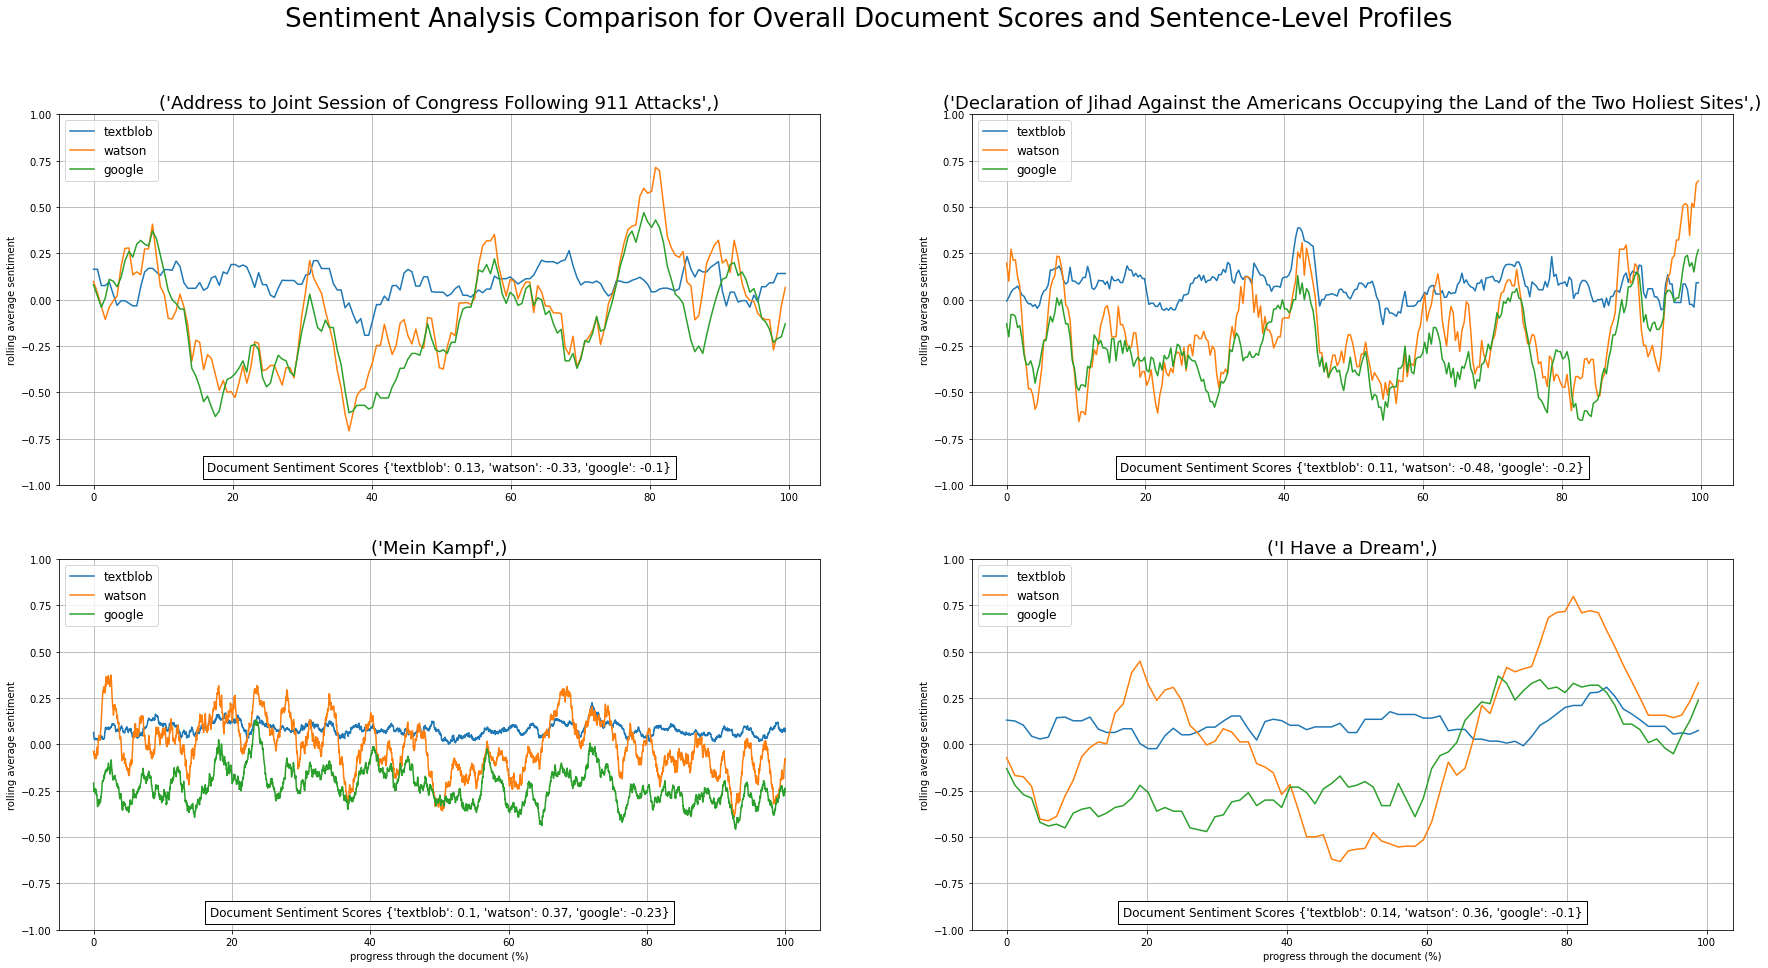

In [58]:
import importlib
import cndplots
importlib.reload(cndplots)

# setup document references
# orator ref // document reference // smoothing window
orators_list = [("bush", 4, 10), ("laden", 0, 10), ("hitler", 0, 70), ("king", 1, 10)]

fig = cndplots.sentiment_plot(orators_list, sentiment_analytics, smooth = True, \
                    figtitle = 'Sentiment Analysis Comparison for Overall Document Scores and Sentence-Level Profiles',
                    xlabel = 'progress through the document (%)',
                    ylabel = 'rolling average sentiment')
fig.savefig(fname = "sentiment_plots")

### Test 2 - Discussion

These four graphs show a sentence level sentiment profiles against each API for significant texts from the dataset.

Firstly consider the profile of both Bush’s and bin Laden’s texts in which they declare war upon each other. Both have similar sentiment profiles relative to positivity and negativity; however, the sentiment relative to how they were received was very different. Their supporters would receive each positively while their opponents would view them negatively. Moreover, transcripts of Bush’s speech show how people applauded statements these APIs scored negativity.

Secondly, in a dataset of extremes, we can see the profile for Mein Kampf is indistinguishable from the rest. We might expect such an extremely harmful body of words to produce more stark results. Notably, if you look at the overall document scores, where Mein Kampf and I Have a Dream are extreme opposites in terms of sentiment, Watson and TextBlob determine both as positive, and Google determines them to be negative. 

In a face-to-face discussion, we might now discuss what these results mean, and inevitably there will be disagreement, yet what is the assessment framework for analysing sentiment that moderates our differences in agreement? Missing from teh y axis of each graph is a unit of measurement for sentiment, so how can we assess what does not have a defined metric? What we might agree upon for now is that for a dataset comprising extremes of sentiment, and APIs of extremes in technical sophistication, these results distort th intended meaning of each text. And perhaps in how these APIs are unable to distinguish Mein Kampf from the others, these results might also be regarded as somewhat troublesome.

## More tests to follow

In [19]:
import pandas as pd

# pd.set_option('expand_frame_repr', True)
pd.DataFrame(sentiment_analysis["hitler"][0]["most_pos_sents"]["textblob"])

,text,score
0,"Over against all this, the völkisch concept of...",1.0
1,"What, for instance, could a royal and imperial...",1.0
2,In this way frontier colonies could gradually ...,1.0
3,The best defence will not be in the arms it po...,1.0
4,It must take care that the positions of leader...,1.0
5,I demanded of them that they should come forwa...,1.0
6,And it made a very great impression.,1.0
7,"At best it has subjects, but not citizens.",1.0
8,At that time this appeared a wonderful thing t...,1.0
9,The result of this experiment was generally ex...,1.0
